### import libraries

In [1]:
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn
# !pip install scipy
# !pip install statsmodels

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import statsmodels.api as sm

### Load in the Dataset in Jupyter Notebook

In [3]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [4]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


The following describes the dataset variables:

*      CRIM - per capita crime rate by town

*      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

*      INDUS - proportion of non-retail business acres per town.

*      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

*      NOX - nitric oxides concentration (parts per 10 million)

*      RM - average number of rooms per dwelling

*      AGE - proportion of owner-occupied units built prior to 1940

*      DIS - weighted distances to five Boston employment centres

*      RAD - index of accessibility to radial highways

*      TAX - full-value property-tax rate per $10,000

*      PTRATIO - pupil-teacher ratio by town

*      LSTAT - % lower status of the population

*      MEDV - Median value of owner-occupied homes in $1000's

## Generate Descriptive Statistics and Visualizations

#### 1. For the "Median value of owner-occupied homes" provide a boxplot

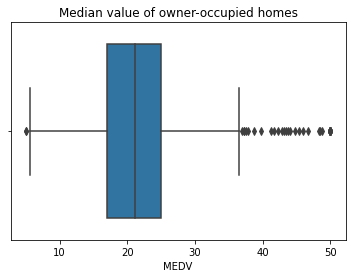

In [5]:
sns.boxplot(x='MEDV', data=boston_df)
plt.title('Median value of owner-occupied homes')
plt.show()

#### 2. Provide a histogram for the Charles river variable

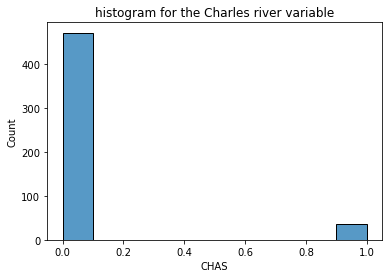

In [6]:
sns.histplot(data=boston_df, x="CHAS")
plt.title('histogram for the Charles river variable')
plt.show()

#### 3. Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

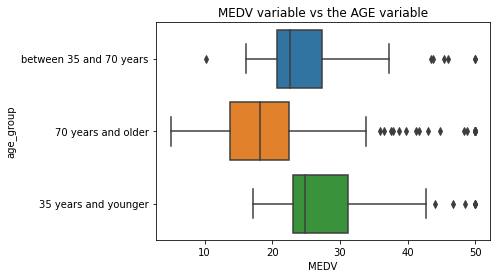

In [7]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

sns.boxplot( x=boston_df["MEDV"], y=boston_df["age_group"])
plt.title('MEDV variable vs the AGE variable')
plt.show()

#### 4. Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

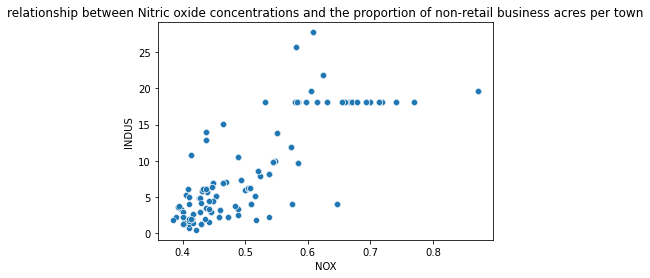

if nitrogen oxide concentrations increase, the proportion of land devoted to non-retail operations per city also increases


In [8]:
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.title('relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town')
plt.show()
print('if nitrogen oxide concentrations increase, the proportion of land devoted to non-retail operations per city also increases')

#### 5. Create a histogram for the pupil to teacher ratio variable

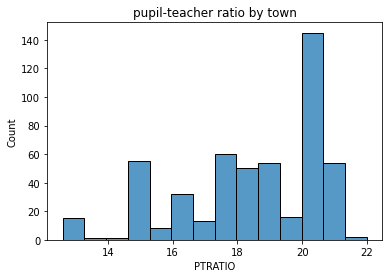

In [9]:
sns.histplot(data=boston_df, x="PTRATIO")
plt.title('pupil-teacher ratio by town')
plt.show()

## Use the appropriate tests to answer the questions provided

#### question 1: Is there a significant difference in median value of houses bounded by the Charles river or not?

State the hypothesis

*   $H\_0: mean_1 = mean_2$  ("there is no difference in MEDV based on Charles river")
*   $H\_1: mean_1 ≠ mean_2$  ("there is a difference in MEDV based on Charles river")
*   $alpha = 0.05$

In [10]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1.]['MEDV'], boston_df[boston_df['CHAS'] == 0.]['MEDV'])

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in MEDV based on Charles river

#### question 2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

State the hypothesis

*   $H\_0: mean_1 = mean_2 = mean_3$ (the three means are equal)
*   $H\_1:$ At least one of the means differ
*   $alpha = 0.05$

In [11]:
thirtyfive_lower_MEDV = boston_df.loc[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy_MEDV = boston_df.loc[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older_MEDV = boston_df.loc[boston_df['age_group'] == '70 years and older']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower_MEDV, thirtyfive_seventy_MEDV, seventy_older_MEDV)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** we will reject the null hypothesis since the p-value is less than 0.05 there is significant evidence that at least one of the means differ.

#### question 3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

State the hypothesis:

*   $H\_0:$ Nitric oxide concentrations are not correlated with proportion of non-retail business acres per town
*   $H\_1:$ Nitric oxide concentrations are correlated with proportion of non-retail business acres per town
*   $alpha = 0.05$

Since they are both continuous variables we can use a pearson correlation test and draw a scatter plot

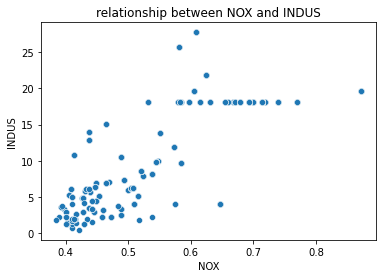

In [12]:
sns.scatterplot(x="NOX", y="INDUS", data=boston_df)
plt.title('relationship between NOX and INDUS')
plt.show()

In [13]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.763651446920915, 7.913361061239593e-98)

**Conclusion:** Since the p-value < 0.05, we reject  the Null hypothesis and conclude that there exists a 
relationship between NOX and INDUS.

#### question 4: What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?

State the hypothesis:

*   $H\_0: beta_1$ = 0 (an additional weighted distance to the five Boston employment centres has no effect on the median value of owner occupied homes)
*   $H\_1: beta_1$ is not equal to 0 (an additional weighted distance to the five Boston employment centres has an effect on the median value of owner occupied homes)
*   $alpha = 0.05$

In [14]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 08 Nov 2021   Prob (F-statistic):           1.21e-08
Time:                        22:00:26   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** Since the p-value < 0.05, we reject the Null hypothesis and conclude that there exists a 
relationship between DIS and MEDV.